In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Adidas US Sales Datasets.csv",skiprows=4)
df.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$6,00,000","$3,00,000",50%,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$5,00,000","$1,50,000",30%,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$4,00,000","$1,40,000",35%,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$3,82,500","$1,33,875",35%,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$5,40,000","$1,62,000",30%,In-store


In [3]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [4]:
df.shape

(9648, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


In [6]:
float_columns=['Price per Unit','Units Sold','Operating Profit','Operating Margin','Total Sales']
for i in float_columns:
    df[i]=df[i].str.replace('$','').str.replace(',','').str.replace('%','').str.replace(' ','')

In [7]:
df['Price per Unit']=df['Price per Unit'].astype(float)
df['Units Sold']=df['Units Sold'].astype(int)
df['Total Sales']=df['Total Sales'].astype(float)
df['Operating Profit']=df['Operating Profit'].astype(float)
df['Operating Margin']=df['Operating Margin'].astype(float)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   int64  
 2   Invoice Date      9648 non-null   object 
 3   Region            9648 non-null   object 
 4   State             9648 non-null   object 
 5   City              9648 non-null   object 
 6   Product           9648 non-null   object 
 7   Price per Unit    9648 non-null   float64
 8   Units Sold        9648 non-null   int32  
 9   Total Sales       9648 non-null   float64
 10  Operating Profit  9648 non-null   float64
 11  Operating Margin  9648 non-null   float64
 12  Sales Method      9648 non-null   object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 942.3+ KB


In [9]:
df.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.282131,42.299129
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.124141,9.719742
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,10.000000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1922.000000,35.000000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.500000,41.000000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52063.000000,49.000000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,80.000000


In [10]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

In [11]:
df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

# Top selling Product

In [12]:
top_selling_products = df.groupby('Product')['Total Sales'].sum().reset_index() 

top_selling_products.index += 1
top_selling_products

,Product,Total Sales
1,Men's Apparel,123728632.0
2,Men's Athletic Footwear,153673680.0
3,Men's Street Footwear,208826244.0
4,Women's Apparel,179038860.0
5,Women's Athletic Footwear,106631896.0
6,Women's Street Footwear,128002813.0


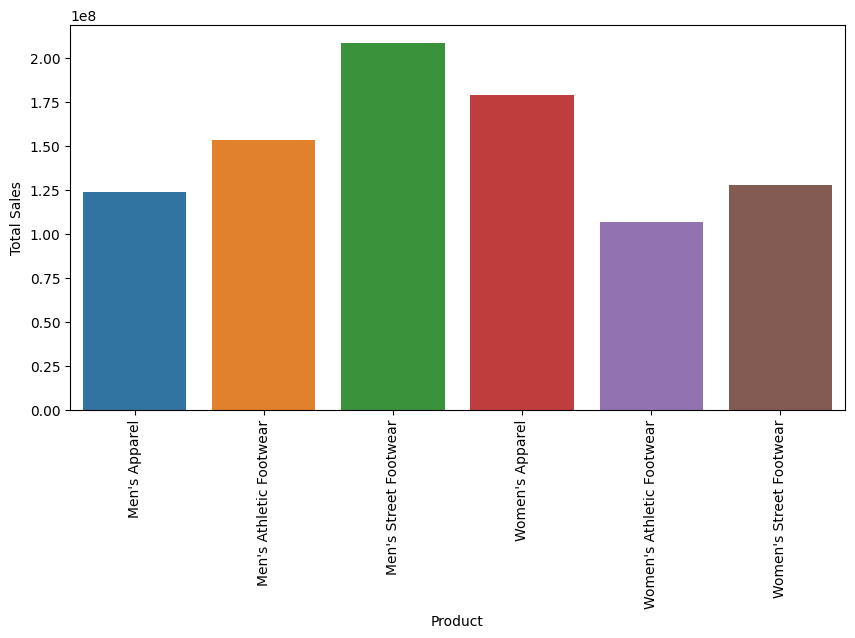

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_selling_products,x='Product',y='Total Sales')
plt.xticks(rotation=90)
plt.show()

Men's street foot wear is the top selling product

# Top grossing City

In [14]:
top_grossing_city= df.groupby('City')['Operating Profit'].sum().sort_values(ascending=False).reset_index().head(10) 
top_grossing_city.index+=1
top_grossing_city

,City,Operating Profit
1,Charleston,15607205.0
2,New York,13899981.0
3,Miami,12168628.0
4,Portland,10760813.0
5,San Francisco,10256252.0
6,Houston,9845140.0
7,Charlotte,9756425.0
8,Albany,9429864.0
9,New Orleans,9417239.0
10,Birmingham,9147581.0


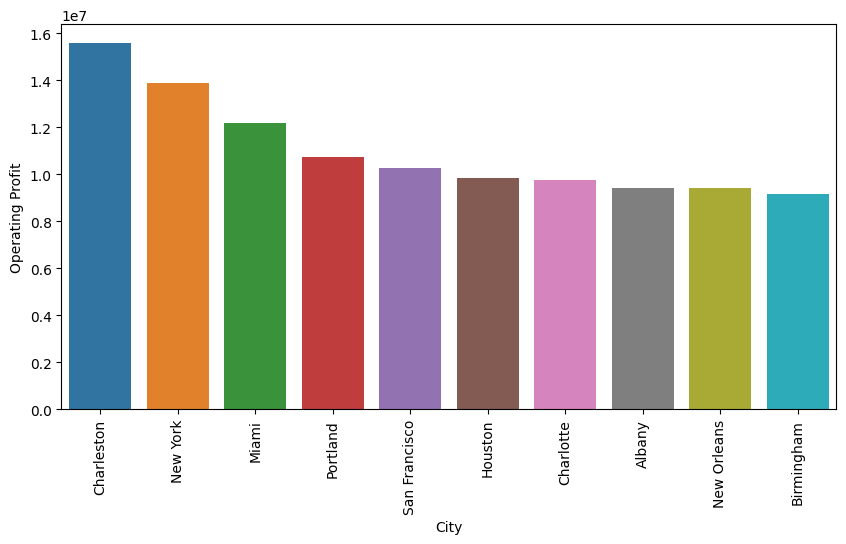

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x='City',y='Operating Profit',data=top_grossing_city)
plt.xticks(rotation=90)
plt.show()

Charleston and New york city has highest operating margin

# Who are the top retailers

In [16]:
Top_retailer=df.groupby('Retailer')['Operating Profit'].sum().sort_values(ascending=False).reset_index()
Top_retailer.index+=1
Top_retailer

,Retailer,Operating Profit
1,West Gear,85667968.0
2,Foot Locker,80722234.0
3,Sports Direct,74333022.0
4,Kohl's,36811302.0
5,Amazon,28818533.0
6,Walmart,25782063.0


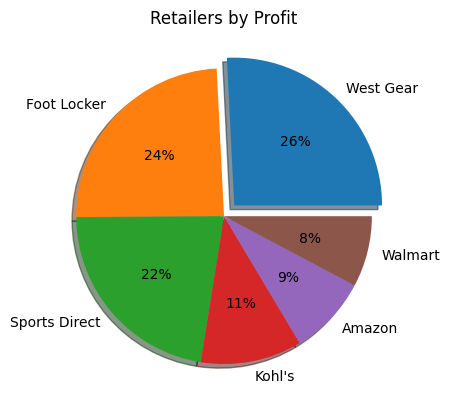

In [17]:
plt.pie(Top_retailer["Operating Profit"], labels = Top_retailer["Retailer"],explode=(0.1,0,0,0,0,0),shadow=True,autopct='%1.0f%%')
plt.title('Retailers by Profit')
plt.show()

top seller is west Gear followed by footlocker

# Top Selling Method

In [18]:
Top_method=df.groupby('Sales Method')['Total Sales'].sum().sort_values(ascending=False).reset_index()
Top_method.index+=1
Top_method

,Sales Method,Total Sales
1,In-store,356643750.0
2,Outlet,295585493.0
3,Online,247672882.0


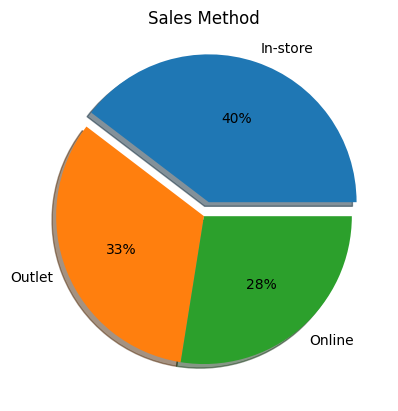

In [19]:
plt.pie(Top_method["Total Sales"], labels = Top_method["Sales Method"],explode=(0.1,0,0),shadow=True,autopct='%1.0f%%')
plt.title('Sales Method')
plt.show()

Adidas sells more through in-store and outlets than online

In [20]:
df.corr()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
Retailer ID,1.000000,-0.391684,-0.003194,-0.083580,-0.027137,0.216780
Price per Unit,-0.391684,1.000000,0.265869,0.435811,0.394546,-0.137486
Units Sold,-0.003194,0.265869,1.000000,0.913431,0.892379,-0.305479
Total Sales,-0.083580,0.435811,0.913431,1.000000,0.956307,-0.364592
Operating Profit,-0.027137,0.394546,0.892379,0.956307,1.000000,-0.211921
Operating Margin,0.216780,-0.137486,-0.305479,-0.364592,-0.211921,1.000000


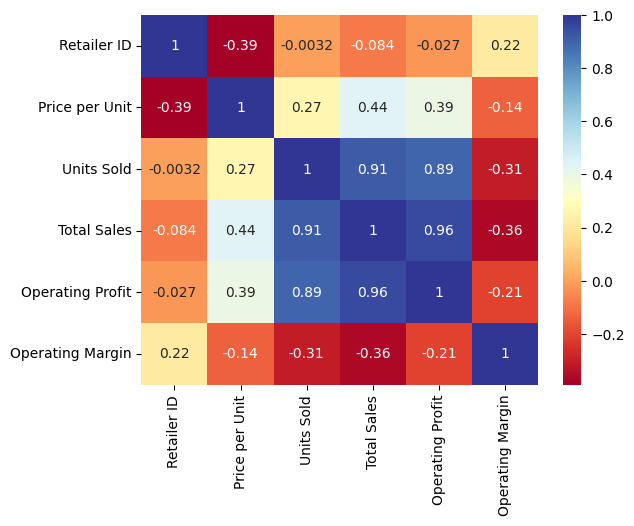

In [21]:
sns.heatmap(df.corr(),cmap="RdYlBu",annot=True)
plt.show()

Total Sales correlation value with Operating Profit = 0.96

Total Sales correlation value with Units Sold = 0.91

Total Sales correlation value with Price per Unit = 0.44

In [22]:
df['month']=df['Invoice Date'].dt.strftime('%b%y')
df.month.unique()

array(['Jan20', 'Feb20', 'Mar20', 'Apr20', 'May20', 'Jun20', 'Jul20',
       'Aug20', 'Sep20', 'Oct20', 'Nov20', 'Dec20', 'Jan21', 'Feb21',
       'Mar21', 'Apr21', 'May21', 'Jun21', 'Jul21', 'Aug21', 'Sep21',
       'Oct21', 'Nov21', 'Dec21'], dtype=object)

In [23]:
df['month'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9648 entries, 0 to 9647
Series name: month
Non-Null Count  Dtype 
--------------  ----- 
9648 non-null   object
dtypes: object(1)
memory usage: 75.5+ KB


In [24]:
unit_sold_by_month=df[['Invoice Date','Units Sold']].resample('M',on='Invoice Date').sum()
unit_sold_by_month.rename(columns={'Invoice Date' : 'Months'})

unit_sold_by_month

,Units Sold
Invoice Date,
2020-01-31,44261
2020-02-29,27646
2020-03-31,38347
2020-04-30,66157
2020-05-31,33406
2020-06-30,27379
2020-07-31,47676
2020-08-31,53242
2020-09-30,38695


Text(0.5, 1.0, 'UNITS SOLD BY MONTHS')

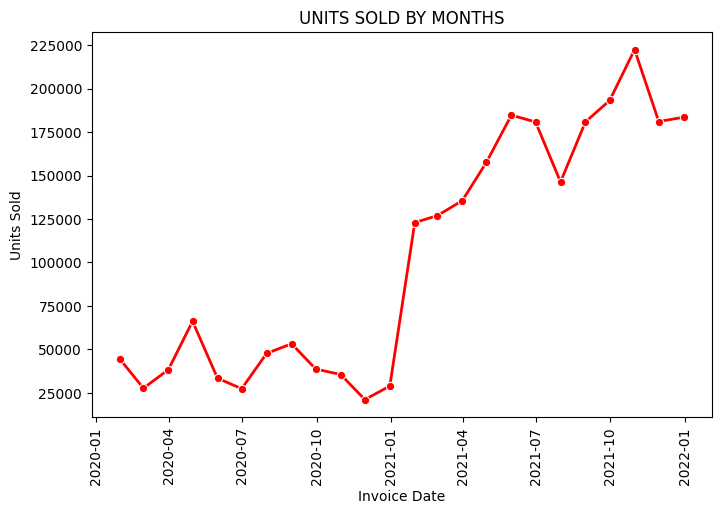

In [25]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Invoice Date', y='Units Sold', data=unit_sold_by_month,color='red',marker='o',linewidth=2)
plt.xticks(rotation=90)
plt.title('UNITS SOLD BY MONTHS')

In [26]:
Region_sales=df.groupby('Region')['Total Sales'].sum().reset_index()
Region_sales.sort_values(by='Total Sales',ascending=False,inplace=True)
Region_sales

,Region,Total Sales
4,West,269943182.0
1,Northeast,186324067.0
3,Southeast,163171236.0
2,South,144663181.0
0,Midwest,135800459.0


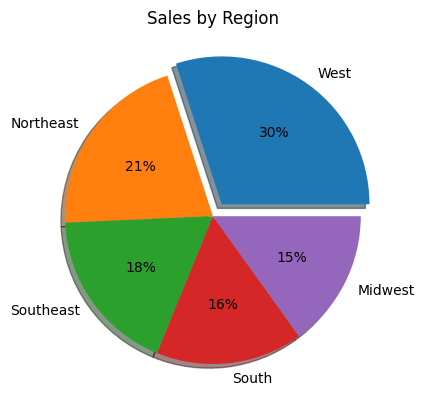

In [27]:
plt.pie(Region_sales["Total Sales"], labels = Region_sales["Region"],explode=(0.1,0,0,0,0),shadow=True,autopct='%1.0f%%')
plt.title('Sales by Region')
plt.show()

In [28]:
Margin_by_city=df.groupby('City')['Operating Margin'].mean().reset_index()
Margin_by_city.sort_values(by='Operating Margin',ascending=False,inplace=True)
Margin_by_city

,City,Operating Margin
6,Birmingham,55.356481
25,Knoxville,50.657407
18,Detroit,47.576389
5,Billings,47.104167
11,Charlotte,46.354167
15,Dallas,46.240741
14,Columbus,45.902778
7,Boise,45.893519
38,Omaha,45.791667
24,Jackson,45.430556


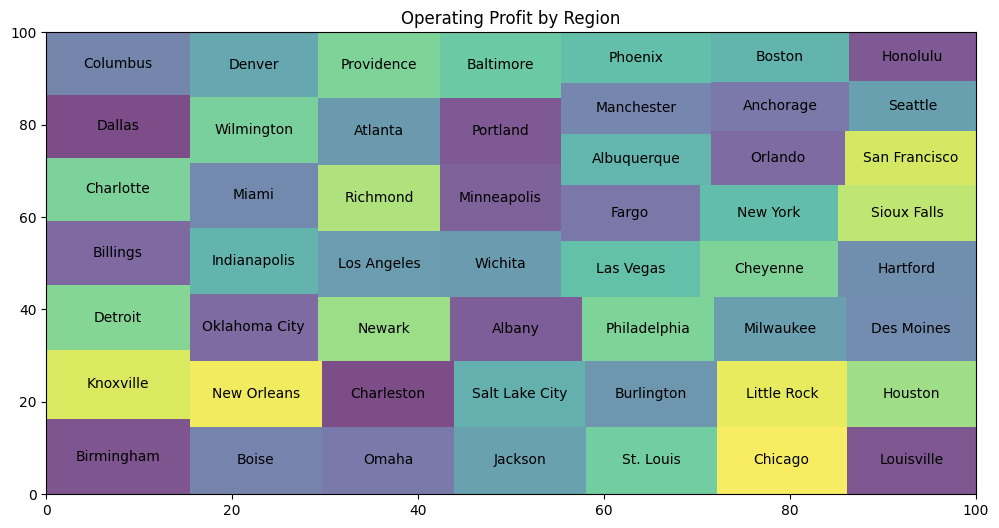

In [29]:
plt.figure(figsize=(12, 6))
squarify.plot(sizes=Margin_by_city['Operating Margin'],label=Margin_by_city['City'],alpha=0.7)
plt.title('Operating Profit by Region')
plt.show()